<a href="https://colab.research.google.com/github/hager2164/tasks_follow/blob/main/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/Position_Salaries.csv'
df = pd.read_csv(url, on_bad_lines='skip')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
X = df.iloc[:, 1:-1].values
y =df.iloc[:, -1].values
print ("x="+ str(X) + "y="+str(y))
y = y.reshape(len(y), 1)
print (y)

x=[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]y=[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
print (X)
print (y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [7]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor .fit(X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [12]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[12.5]])).reshape(-1, 1))

array([[411842.2125027]])

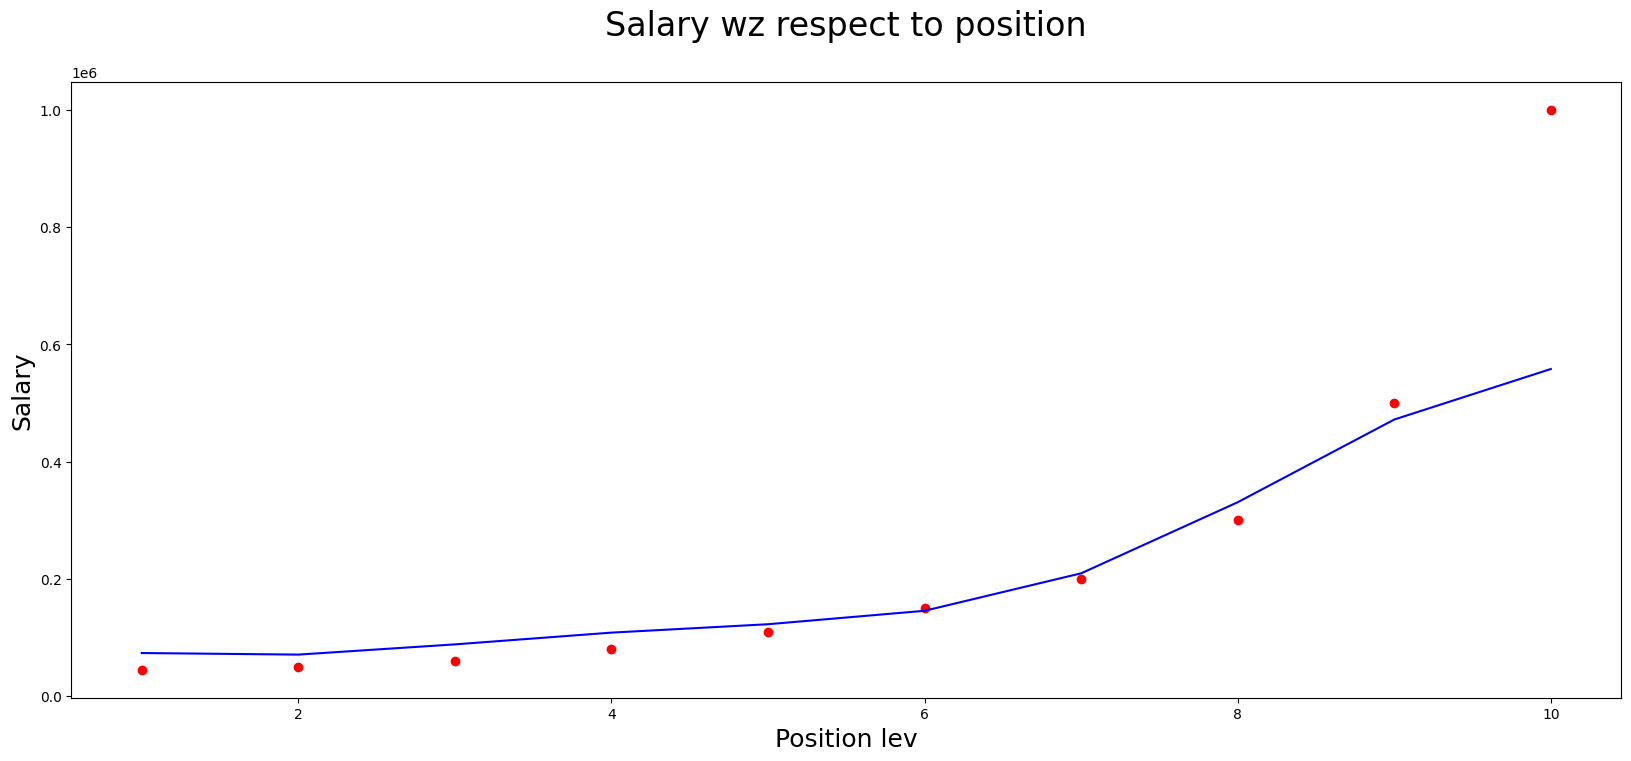

In [14]:
plt.figure(figsize=(20,8))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color = 'blue')
plt.title('Salary wz respect to position\n',size=24)
plt.xlabel('Position lev',size=18)
plt.ylabel('Salary',size=18)
plt.show()

/tmp/ipython-input-757293061.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


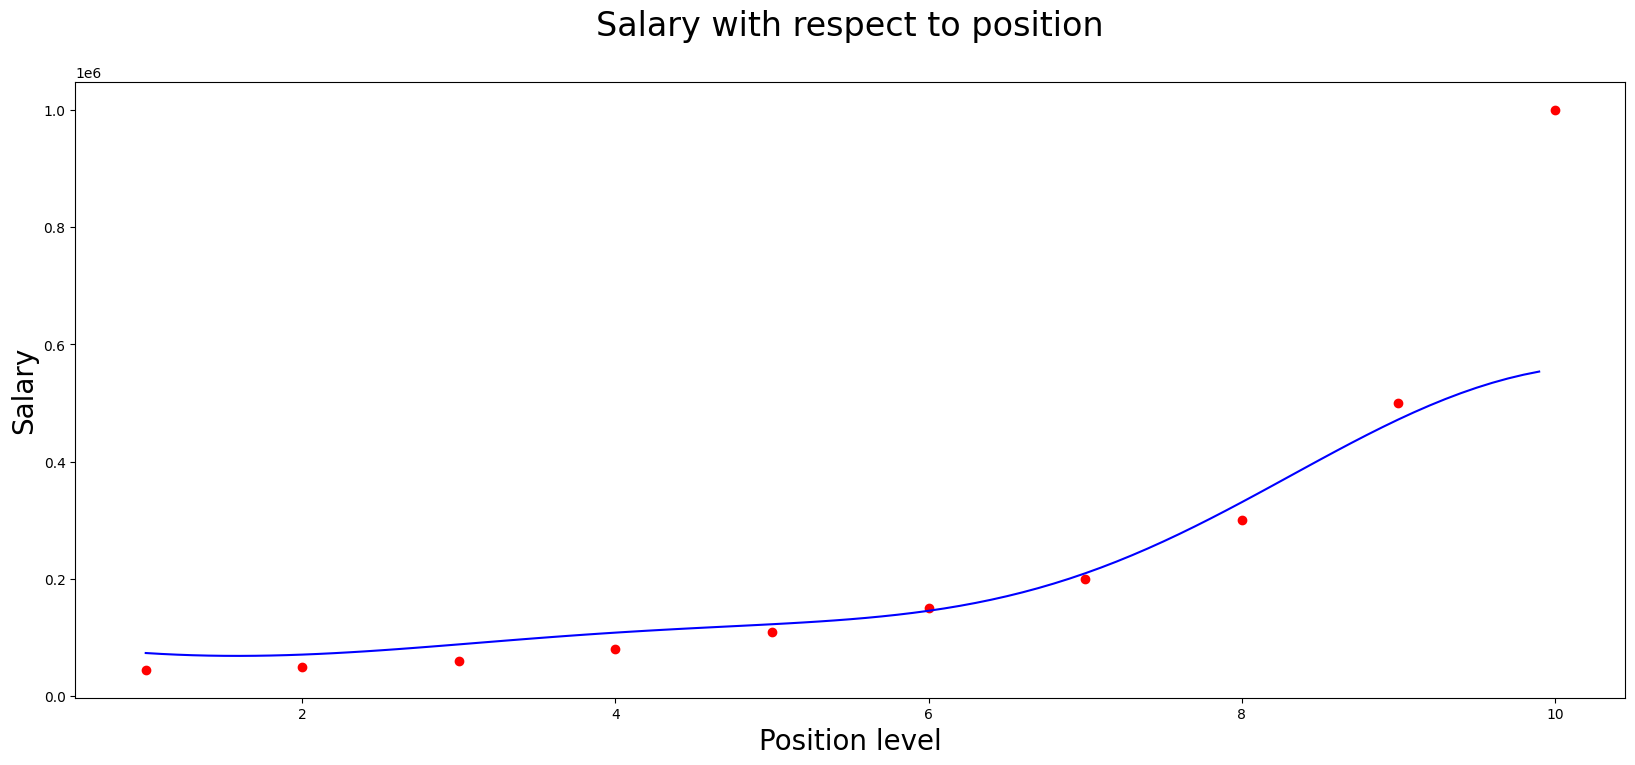

In [16]:
# visualize with higher resolution
plt.figure(figsize=(20,8))
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1) ), color = 'blue')
plt.title('Salary with respect to position\n',size=24)
plt.xlabel('Position level',size=20)
plt.ylabel('Salary',size=20)
plt.show()